# Classification with Random Forest Classifier  

After cleaning and analysing the dataset we proceed with a classifier, which is carried on with the random forest classifier algorithm

![random-forest.jpg](random-forest.jpg)

## Preparing the data 

We import the relevant libraries from ScikitLearn

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

We import the data from `TWER_grouped_class.csv`:

In [4]:
df = pd.read_csv('../data/processed/TWER_grouped_class.csv').drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,date,municipality.name,hour_category,temperature,minTemperature,maxTemperature,precipitation,wind_speed,wind_dir,curr_cell,curr_site,population,elevation,tweet_count,month,day,day_of_week,class
0,2013-11-01,Andalo,A,9.200000,8.5,12.000000,0.0,NaN,NaN,0.000000,0.000000,1024.0,1042.0,1,11,1,4,Low
1,2013-11-01,Baselga di Pinè,B,11.533333,8.0,13.733333,0.0,0.2,236.0,5.996413,0.016458,4928.0,964.0,3,11,1,4,Medium
2,2013-11-01,Baselga di Pinè,C,11.433333,7.3,12.966667,0.0,0.0,184.0,10.637787,0.017426,4928.0,964.0,3,11,1,4,Medium
3,2013-11-01,Baselga di Pinè,D,9.350000,6.6,12.200000,0.0,NaN,NaN,18.809585,0.024556,4928.0,964.0,2,11,1,4,Medium
4,2013-11-01,Bedollo,B,14.120000,8.7,14.500000,0.0,0.3,232.5,0.383955,0.015358,1476.0,1059.0,5,11,1,4,Medium


Before continuing, we need to remove the last day (2013-12-31), on which we will make the prediction.

In [6]:
df = df[df['day'] != 31]

Let's divide `df` into features and target:

In [7]:
X = df.drop('class', axis=1)
y = df['class']  # target is the multi-class label (High, Medium, Low)

We now preprocess the data. 
The classifier only really accepts numbers as an input, so string-to-number conversion of categorical data is essential.
Since this process only concerns categorical data,  we need to split numerical and categorical features first. Second, we enconde the categorical data with label encoding. We then scale the numerical features, convert them back to dataframe form and finally recombine categorical and numerical data

In [8]:
X.columns

Index(['date', 'municipality.name', 'hour_category', 'temperature',
       'minTemperature', 'maxTemperature', 'precipitation', 'wind_speed',
       'wind_dir', 'curr_cell', 'curr_site', 'population', 'elevation',
       'tweet_count', 'month', 'day', 'day_of_week'],
      dtype='object')

In [9]:
def preprocess_data(df, categorical_features, numerical_features):
    # Encode categorical features
    le = LabelEncoder()
    for feat in categorical_features:
        df[feat] = le.fit_transform(df[feat])
    
    # Scale numerical features
    scaler = StandardScaler()
    scaled_numerical = scaler.fit_transform(df[numerical_features])
    
    scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features)
    
    # Combine scaled numerical and encoded categorical features
    df = pd.concat([scaled_numerical_df, df[categorical_features].astype('category')], axis=1)
    
    return df


In [10]:
X.head()

,date,municipality.name,hour_category,temperature,minTemperature,maxTemperature,precipitation,wind_speed,wind_dir,curr_cell,curr_site,population,elevation,tweet_count,month,day,day_of_week
0,2013-11-01,Andalo,A,9.200000,8.5,12.000000,0.0,NaN,NaN,0.000000,0.000000,1024.0,1042.0,1,11,1,4
1,2013-11-01,Baselga di Pinè,B,11.533333,8.0,13.733333,0.0,0.2,236.0,5.996413,0.016458,4928.0,964.0,3,11,1,4
2,2013-11-01,Baselga di Pinè,C,11.433333,7.3,12.966667,0.0,0.0,184.0,10.637787,0.017426,4928.0,964.0,3,11,1,4
3,2013-11-01,Baselga di Pinè,D,9.350000,6.6,12.200000,0.0,NaN,NaN,18.809585,0.024556,4928.0,964.0,2,11,1,4
4,2013-11-01,Bedollo,B,14.120000,8.7,14.500000,0.0,0.3,232.5,0.383955,0.015358,1476.0,1059.0,5,11,1,4


This is now a dataframe we can work with. 

Now we prepare for the regression by splitting Train Data and Test Data. 
We want the test data to be the 20% of the data available (test_size=0.2) and we want to fix a random_state value of 20. 

This is basically like a seed and assures the "random behaviour" of the forest, to be always the same if we run the program the program multiple times. 

In the fase of tuning repeatability is essential, because it is the only way to reliably tune the parameters of the model. 
We then initialise and train the classifier. 

Note : RandomForestClassifier(random_state=20)
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [17]:
def train_and_evaluate(X, y, n_estimators, max_depth=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
    
    # Initialize Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=20)
    
    # Train the classifier
    rf_classifier.fit(X_train, y_train)
    
    # Predictions
    y_pred = rf_classifier.predict(X_test)
    
    # Print results
    print(f"Accuracy with n_estimators={n_estimators} and max_depth={max_depth}: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    ax = plt.subplot()
    sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)
    ax.xaxis.set_ticklabels(['high', 'low', 'medium'])
    ax.yaxis.set_ticklabels(['high', 'low', 'medium'])
    plt.show()
    
    return conf_matrix


In the developement of our analysis we noticed that it was not obvious wether to use all the data we had available or just a part of that. We intend to discuss this matter by examining two data sets: one hat basically trains exlusively on tweet counts and the ARPA's whether data and the largest possible dataset, which also has electrical data and other potentially meaningful categorical features such as 'hour_category', 'month', 'day_of_week', 'population', 'elevation'. 
Naturally these data appear with their relative time slot and municipality. 
We do the traing for both dataset with respectively a little forest (n_estimators=2, max_depht=4) and a large forest (n_estimatprs=100, no max_depht). 
In order to do that we created a function that will execute, with any given parameter, all the steps of our classification. 
Indeed the fucntion 
1) splits the data set in training and test data 
2) Trains the Classifier 
3) Comutes the prediction
4) Prints all the meaningful extimators
5) Plots the confusion matrix and the heatmap 


We create the two relevant Dataframes : 

In [27]:
# Dataset 1 (weather data)
X_weather = df.drop('class', axis=1).drop(['curr_cell', 'curr_site', 'population', 'elevation'], axis=1)
y_weather = df['class']

# Categorical and numerical features
categorical_features_weather = ['date', 'municipality.name', 'hour_category', 'month', 'day_of_week']
numerical_features_weather = ['temperature', 'minTemperature', 'maxTemperature', 'precipitation', 'wind_speed', 'wind_dir', 'tweet_count', 'day']

# Preprocess Dataset 1
X_weather = preprocess_data(X_weather, categorical_features_weather, numerical_features_weather)


In [28]:
# Dataset 2 (weather + other)
X_additional = df.drop('class', axis=1)
y_additional = df['class']

# Categorical and numerical features
categorical_features_additional = ['date', 'municipality.name', 'hour_category', 'month', 'day_of_week']
numerical_features_additional = ['temperature', 'minTemperature', 'maxTemperature', 'precipitation', 'wind_speed', 'wind_dir', 
                                 'curr_cell', 'population', 'elevation', 'curr_site', 'tweet_count', 'day']

# Preprocess Dataset 2
X_additional = preprocess_data(X_additional, categorical_features_additional, numerical_features_additional)


We herby presents all the different scenarios 

Scenario 1: Weather Data with n_estimators=4 and max_depth=4
Accuracy with n_estimators=4 and max_depth=4: 0.9712820512820513
              precision    recall  f1-score   support

        High       1.00      0.24      0.39        37
         Low       1.00      1.00      1.00       441
      Medium       0.95      1.00      0.97       497

    accuracy                           0.97       975
   macro avg       0.98      0.75      0.79       975
weighted avg       0.97      0.97      0.96       975



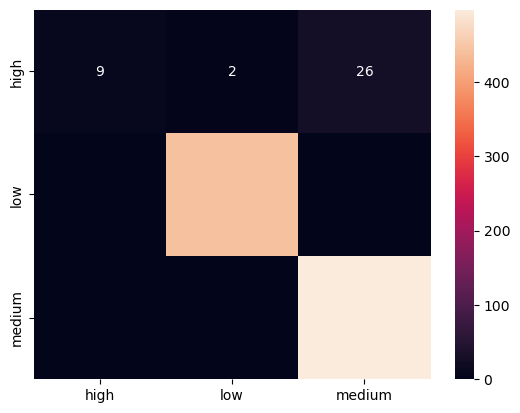

In [29]:
print("Scenario 1: Weather Data with n_estimators=4 and max_depth=4")
conf_matrix1 = train_and_evaluate(X_weather, y_weather, n_estimators=4, max_depth=4)

Scenario 2: Weather + Additional Data with n_estimators=4 and max_depth=4
Accuracy with n_estimators=4 and max_depth=4: 0.9835897435897436
              precision    recall  f1-score   support

        High       1.00      0.62      0.77        37
         Low       1.00      1.00      1.00       441
      Medium       0.97      1.00      0.98       497

    accuracy                           0.98       975
   macro avg       0.99      0.87      0.92       975
weighted avg       0.98      0.98      0.98       975



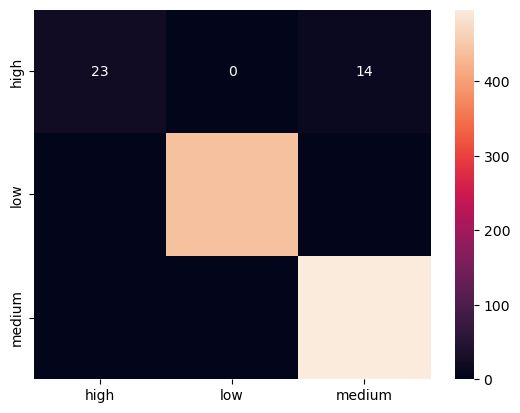

In [30]:
print("Scenario 2: Weather + Additional Data with n_estimators=4 and max_depth=4")
conf_matrix2 = train_and_evaluate(X_additional, y_additional, n_estimators=4, max_depth=4)


Scenario 3: Weather Data with n_estimators=100 and no max_depth
Accuracy with n_estimators=100 and max_depth=None: 0.997948717948718
              precision    recall  f1-score   support

        High       1.00      0.95      0.97        37
         Low       1.00      1.00      1.00       441
      Medium       1.00      1.00      1.00       497

    accuracy                           1.00       975
   macro avg       1.00      0.98      0.99       975
weighted avg       1.00      1.00      1.00       975



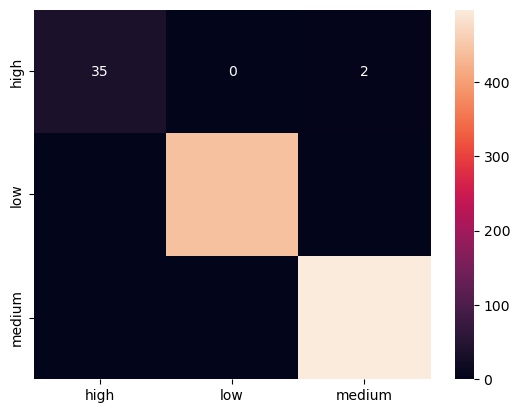

In [31]:
print("Scenario 3: Weather Data with n_estimators=100 and no max_depth")
conf_matrix3 = train_and_evaluate(X_weather, y_weather, n_estimators=100, max_depth=None)


Scenario 4: Weather + Additional Data with n_estimators=100 and no max_depth
Accuracy with n_estimators=100 and max_depth=None: 0.9989743589743589
              precision    recall  f1-score   support

        High       1.00      0.97      0.99        37
         Low       1.00      1.00      1.00       441
      Medium       1.00      1.00      1.00       497

    accuracy                           1.00       975
   macro avg       1.00      0.99      1.00       975
weighted avg       1.00      1.00      1.00       975



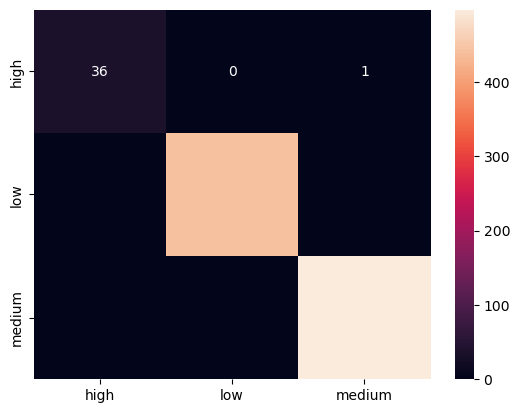

In [32]:
print("Scenario 4: Weather + Additional Data with n_estimators=100 and no max_depth")
conf_matrix4 = train_and_evaluate(X_additional, y_additional, n_estimators=100, max_depth=None)


This result is not obvious, the so called additional data are not correlated as well to tweet count as the whether data, the risk of redundancy or even insignificance of the dataset is high. Indeed form a first trial it seemed to us the results went in this direction. The risk ov oferfitting for a larger dataset is high if there are redundancies , since the model may overlearn patterns. If the "additional data" introduces noise insted of information, it's better to remove that part of the dataset entirely. 
Nevertheless we notice a neat improvement by introducing new data and this signals that the additional data is indeed informative. 
Beyond that, what we notice is that little forests perform way worse tham larger forest, a more in depht  training and a meaningul number of extimators is crucial to generalisation. 
This does not depend on the dataset but it is very general, the eventual point in setting a low number of extimators and max_depht parameter is to make the training computationally feasible, but for us it's no problem since the whole process is very fast. If we were to anlayse the telecommunication data , the correct approach may very well be using low max_depht and low n_extimators. 

As indicated by the the accuracy, the classifier always works fine, even in the little forest case. 
In the last case (larger forest on larger dataset)  we see the promising result of just one misclassification.

We point out that, as emerges form the confusion matrix, the error type is (almost) always the same in the four cases: some municipalities, which are predicted to be in the middle tweet count range, actually end up to be in the high tweet count range.

This makes sense, because, whereas there are not many events outside our dataset which can cause great short term depression in the tweet count, there are lots of social events that may cause an occasional peak in the tweet count. In the dates 13 and 14 Decembers 2013, which present the greatest tweet predictive mistake, a big event called "Universiadi " was held in the municipality of Trento, where such peak is registered.


